In [4]:
import json
import matplotlib.pyplot as plt
import sys
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [5]:
data = Path(r".\facial_keypoints.json")  #Upload the file into drive root and load with this
with open(data, 'r', encoding='utf-8') as file_path:
  data = json.load(file_path)

Note:
This function expects the json file as input.
Use the "train" and "test" keys to access the data.

Example: prepare_data_randomforest(data["train"]) will return the samples with "train" as the last element.  

In [6]:
def prepare_data_randomforest(samples):

    X = [] #Placeholder for random forest training set
    y = [] #Labells for supervised learning. smile = 1, 0 if not

    for sample in samples:

        keypoints = sample[1:-1] #Dont need the first and the last values, so skip em
        flat_keypoints = [coord for point in keypoints for coord in point] # Flatten the list of x, y into 1d. This is for random forest input
        X.append(flat_keypoints)

        # Smile status is the last element in the sample, in a dictionary
        smiling = sample[-1]['smile']
        y.append(1 if smiling else 0) # Append for True as 1, False as 0
    return np.array(X), np.array(y)

The function for training the model for this task.
It will take the data, call the prepare_data_randomforest(data) and return the trained randomforest model.


In [7]:
def train_randomforest(data, estimators):
    X_train, y_train = prepare_data_randomforest(data)     #Returns np.arrays as X_train, y_train
    model = RandomForestClassifier(n_estimators= estimators, random_state= 10)
    try:
      model.fit(X_train, y_train) #Expects np.array dtype for X_train, y_train
      model_size_bytes = sys.getsizeof(model)
      print(f"Size of the random forest model: {model_size_bytes} bytes")

      return model
    except ValueError:
        print("Unexpected input. Make sure that the training data is correctly formatted.")

In [8]:
X_test, y_test = prepare_data_randomforest(data['test']) #Test data from the json file
#print(f"X_test={X_test},\n, y_test={y_test}")           #optional for veiwing the data.

In [9]:
model = train_randomforest(data["train"], 50) #Use this only when training.

Size of the random forest model: 56 bytes


In [10]:
y_pred = model.predict(X_test) #Use the model to predict

This cell is for the metrics.
The above y_pred will be used for the validation

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf = confusion_matrix(y_test, y_pred)
print("________Validation metrics______________\n")
print(f"  Accuracy: {(accuracy*100):.0f}%")
print(f"  Precision: {(precision*100):.0f}%")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print("\n_______________________________________")
print("\nConfusion Matrix:")
print(conf)


________Validation metrics______________

  Accuracy: 92%
  Precision: 93%
  Recall: 0.9216
  F1-Score: 0.9246

_______________________________________

Confusion Matrix:
[[118  11]
 [ 12 141]]


Expected data for this function:

facial_data : list
        A list with the following structure:
        [
            "sample ID",
            [x1, y1],  # feature1
            [x2, y2],  # feature2
            ...
            [x15, y15]  # 15
        ]
        where each [x, y] represents the coordinates of a facial keypoint.

In [12]:
def smile_predict(facial_data: list) -> bool:
  X = [] #Placeholder
  flat_keypoints = [coord for point in facial_data[1:] for coord in point] # Flatten the list of x, y into 1d. This is for random forest input
  X.append(flat_keypoints) #Add the flattened array
  X = np.array(X) #Convert to np.array
  y_pred = model.predict(X) #Predict using X

  return True if y_pred == 1 else False

In [13]:
%%time

test = data['test']

print("___Predictions vs GT_____")
fails = {"Fail Cases": [], "Total Fails":0}
for idx, sample in enumerate(test, start=1):
    face_input = sample[:-1] 
    gt_bool = sample[-1]['smile']
    pred_bool = smile_predict(face_input)
    
    if gt_bool != pred_bool:
        fails["Total Fails"] +=1 
        fails["Fail Cases"].append(f"{idx:03d}")

        
    gt = 'smile' if gt_bool else 'not smile'
    pred = 'smile' if pred_bool else 'not smile'
    
    print(f"[{idx:03d}] Input ID: {face_input[0]} → Pred: {pred} , GT: {gt}")
print(fails)

=== Test Data Predictions vs Ground Truth ===
[001] Input ID: el0etgO0lV → Pred: not smile , GT: not smile
[002] Input ID: t0eKPqRqap → Pred: not smile , GT: not smile
[003] Input ID: Y5crMjuXoD → Pred: smile , GT: smile
[004] Input ID: 6ED4JFqQT4 → Pred: not smile , GT: not smile
[005] Input ID: uXGZOKRlG4 → Pred: not smile , GT: smile
[006] Input ID: sCTN8vfQCl → Pred: smile , GT: smile
[007] Input ID: HHJILic8r7 → Pred: smile , GT: smile
[008] Input ID: Ye6cD5YaiK → Pred: smile , GT: smile
[009] Input ID: vNSHMaCjlj → Pred: smile , GT: smile
[010] Input ID: 3M41I4E9pY → Pred: not smile , GT: not smile
[011] Input ID: ND2YcZbnys → Pred: smile , GT: smile
[012] Input ID: s0m8aGw7GA → Pred: smile , GT: smile
[013] Input ID: RnRlzWyOrW → Pred: smile , GT: smile
[014] Input ID: 5wtUnKT6dh → Pred: smile , GT: smile
[015] Input ID: f3iqR2cuxe → Pred: smile , GT: smile
[016] Input ID: SwZ2RR93rY → Pred: not smile , GT: not smile
[017] Input ID: bwycl8uaqI → Pred: smile , GT: smile
[018] Inp

[225] Input ID: B4RGcC23VJ → Pred: smile , GT: smile
[226] Input ID: RPW4T1Cws5 → Pred: smile , GT: smile
[227] Input ID: NbEFdBuEcw → Pred: smile , GT: smile
[228] Input ID: acnyghTflS → Pred: smile , GT: smile
[229] Input ID: jjA2T44Ugx → Pred: not smile , GT: not smile
[230] Input ID: 3fu2Madyps → Pred: smile , GT: smile
[231] Input ID: VZZDpTPFJG → Pred: smile , GT: smile
[232] Input ID: f7XVwuJk6h → Pred: not smile , GT: smile
[233] Input ID: YQWOcENK1U → Pred: smile , GT: smile
[234] Input ID: uHcRnmXVab → Pred: not smile , GT: not smile
[235] Input ID: OSroMBo8Tt → Pred: smile , GT: smile
[236] Input ID: eoqlakCBSn → Pred: not smile , GT: not smile
[237] Input ID: Jm3nUl1qYO → Pred: smile , GT: smile
[238] Input ID: wndnKOZHSN → Pred: not smile , GT: smile
[239] Input ID: WbmEIYCYvx → Pred: not smile , GT: not smile
[240] Input ID: 3o9CGqUkgE → Pred: smile , GT: smile
[241] Input ID: LZPrv3eVup → Pred: smile , GT: smile
[242] Input ID: M3PYtGW5r2 → Pred: smile , GT: smile
[243] 

This function will classify the points into three groups.
It make use of the K-means to clusterise the data, then classify the clusters into eyes, nose and mouth based on the logic below.
Eyes: The two clusters closest to each other will be the eyes, because this is the reality.
Nose: The cluster with the least number of points will be the nose, because the actual data has only one point for the nose.
Mouth: The widest cluster will be the mouth, because obvoiusly.


In [14]:
def classify_facial_parts(keypoints_2d: list) -> dict:
    keypoints_array = np.array(keypoints_2d)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) #Initialize kmeans with 4 clusters
    kmeans.fit(keypoints_array)

    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    overall_center = np.mean(keypoints_array, axis=0)   #The nose should be here
    distances_to_overall_center = [euclidean(center, overall_center) for center in cluster_centers] #Calculate distances to classify the eye clusters
    nose_cluster_index = np.argmin(distances_to_overall_center) #Obviously the nose is at the center

    classified_parts = {} #Initialize dict
    classified_parts['Nose'] = [keypoints_2d[i] for i, label in enumerate(cluster_labels) if label == nose_cluster_index] # Add into the dict

    remaining_cluster_indices = [i for i in range(4) if i != nose_cluster_index]
    remaining_centroids = [cluster_centers[i] for i in remaining_cluster_indices]

    #Calculate dist for pairs
    pairwise_distances = []
    for i in range(len(remaining_cluster_indices)):
        for j in range(i + 1, len(remaining_cluster_indices)):
            dist = euclidean(remaining_centroids[i], remaining_centroids[j])
            pairwise_distances.append((dist, remaining_cluster_indices[i], remaining_cluster_indices[j]))

    pairwise_distances.sort()

    eye_cluster_index1 = pairwise_distances[0][1]
    eye_cluster_index2 = pairwise_distances[0][2]

    eye_centroid1 = cluster_centers[eye_cluster_index1]
    eye_centroid2 = cluster_centers[eye_cluster_index2]

    if eye_centroid1[0] < eye_centroid2[0]:
        classified_parts['Left Eye'] = [keypoints_2d[i] for i, label in enumerate(cluster_labels) if label == eye_cluster_index1]
        classified_parts['Right Eye'] = [keypoints_2d[i] for i, label in enumerate(cluster_labels) if label == eye_cluster_index2]
    else:
        classified_parts['Left Eye'] = [keypoints_2d[i] for i, label in enumerate(cluster_labels) if label == eye_cluster_index2]
        classified_parts['Right Eye'] = [keypoints_2d[i] for i, label in enumerate(cluster_labels) if label == eye_cluster_index1]

    mouth_cluster_index = -1
    for current_index in remaining_cluster_indices:
        if current_index not in [eye_cluster_index1, eye_cluster_index2]:
            mouth_cluster_index = current_index
            break

    classified_parts['Mouth'] = [keypoints_2d[i] for i, label in enumerate(cluster_labels) if label == mouth_cluster_index]

    return classified_parts

In [15]:
classify_facial_parts(data["test"][1][1:-1]) #Test

C:\Users\Witcher\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{'Nose': [[48, 12], [39, 13], [54, 12], [38, 0], [46, -1]],
 'Left Eye': [[13, 50]],
 'Right Eye': [[31, 35], [48, 49], [31, 52], [31, 52]],
 'Mouth': [[10, 12], [20, 13], [4, 13], [22, 2], [-1, 3]]}

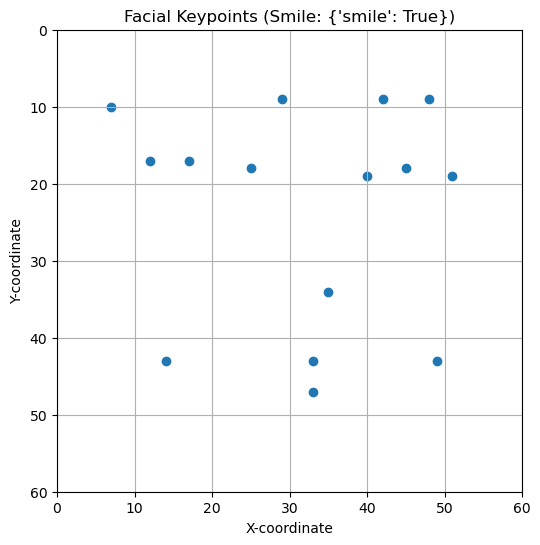

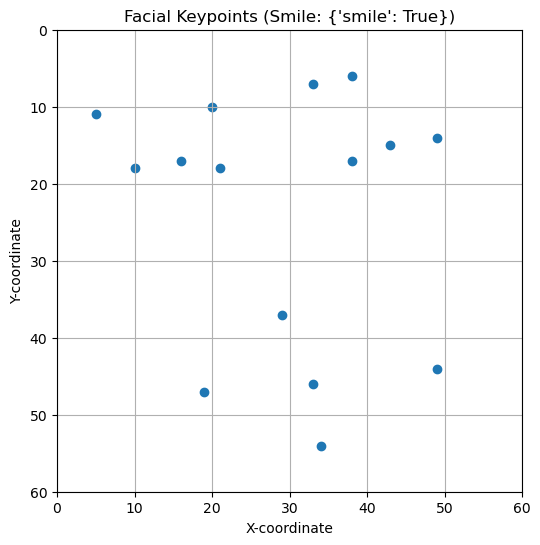

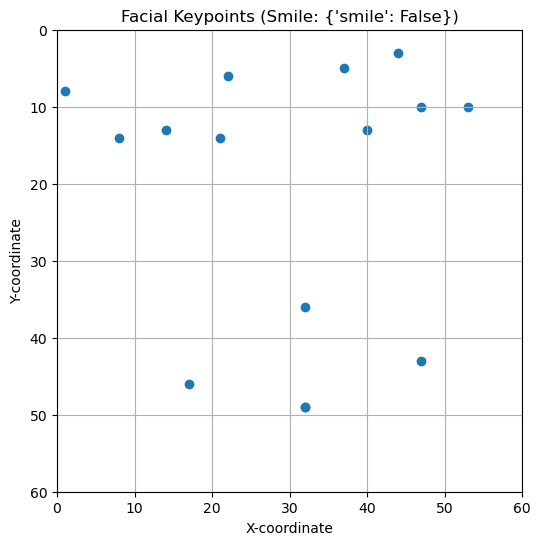

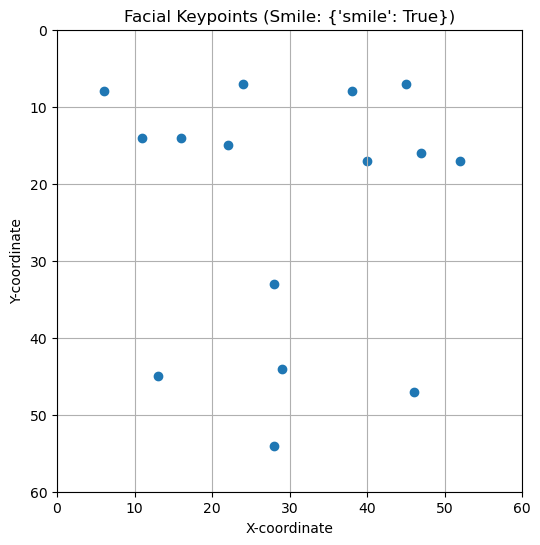

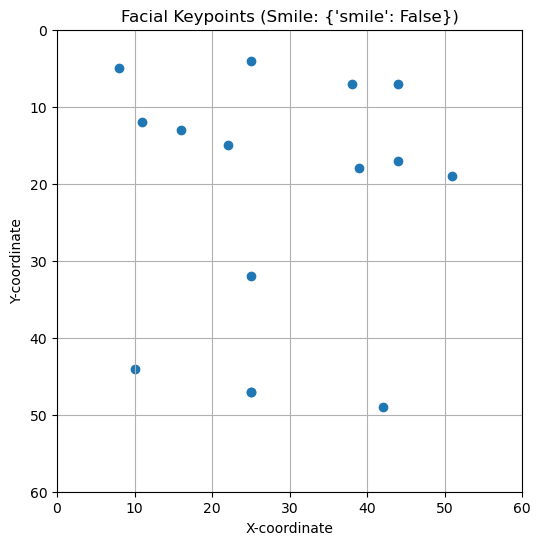

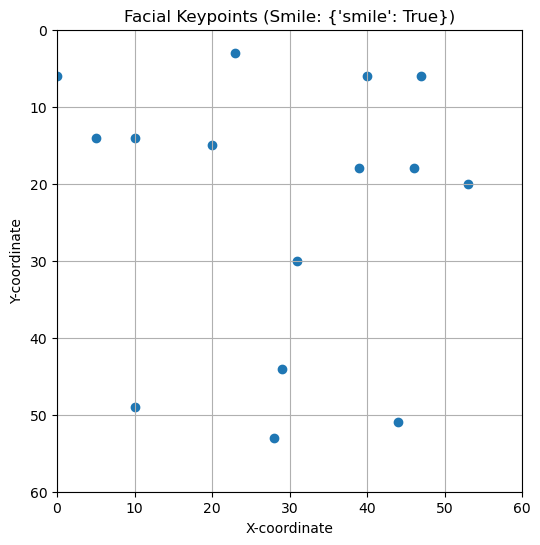

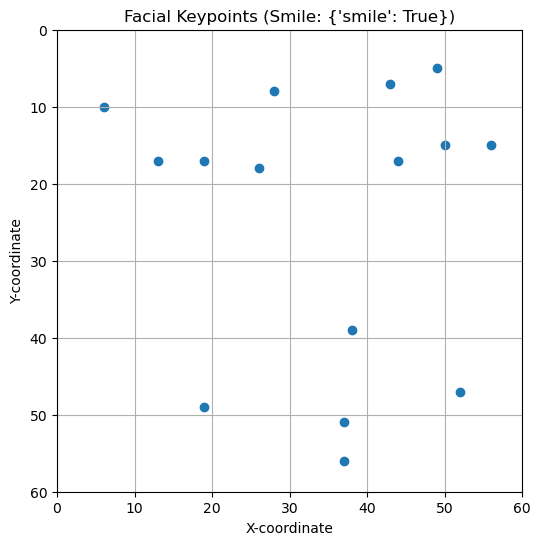

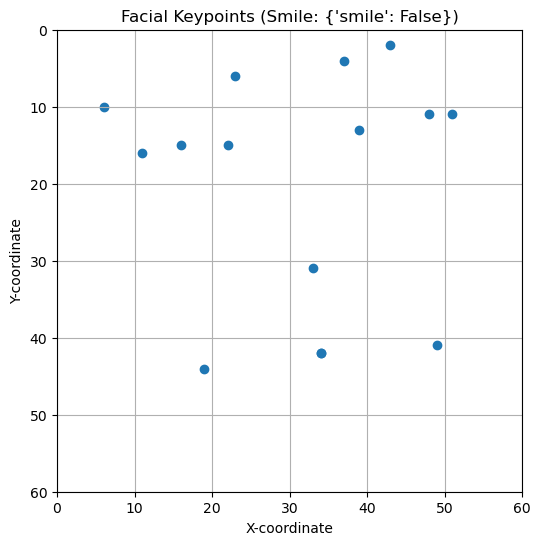

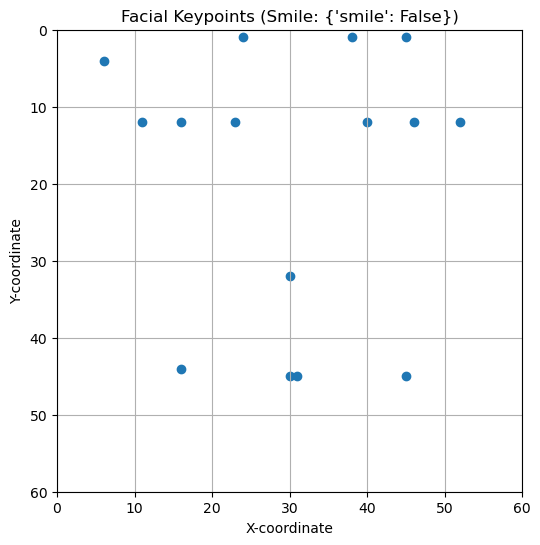

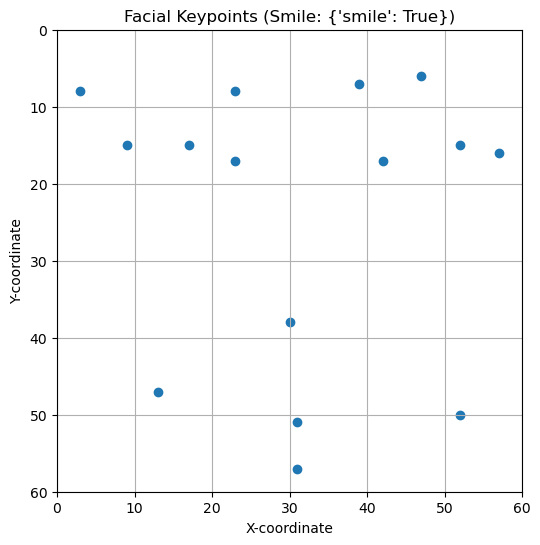

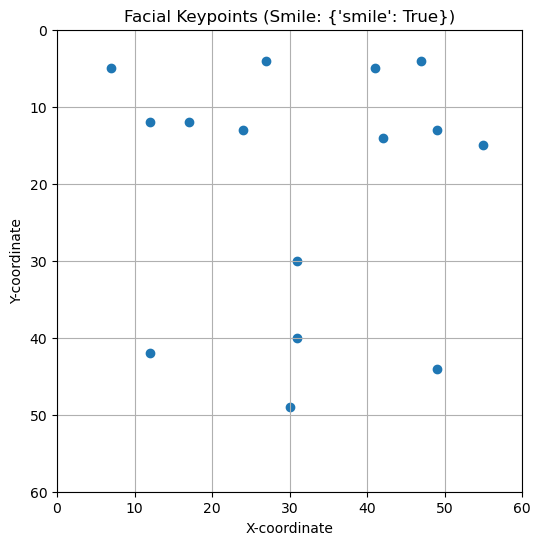

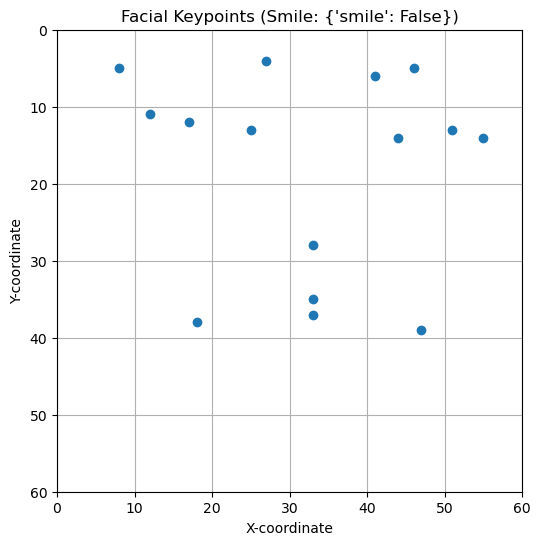

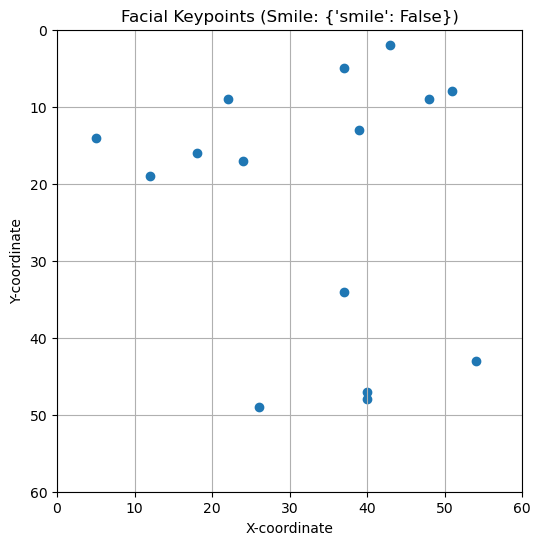

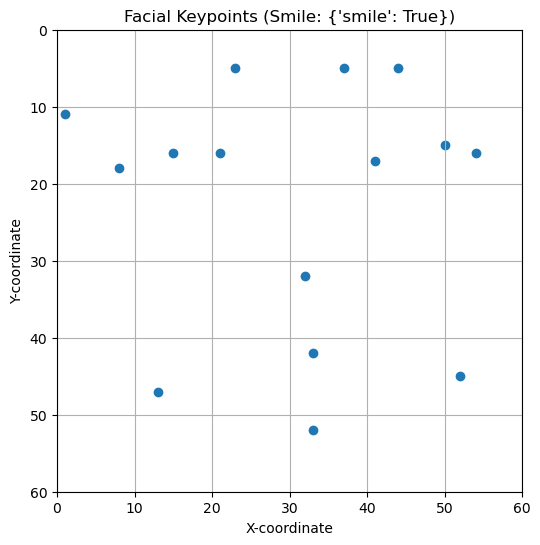

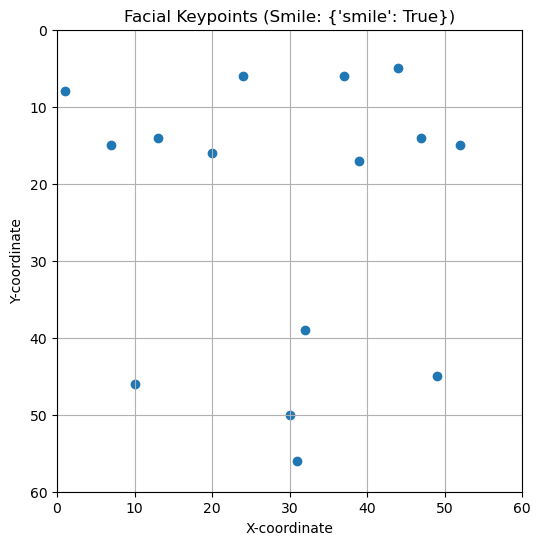

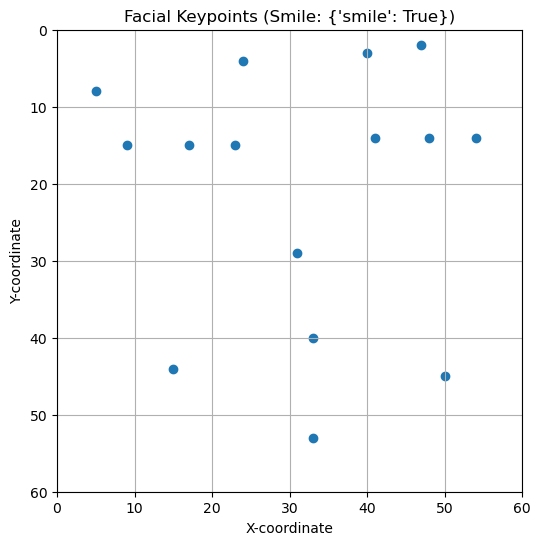

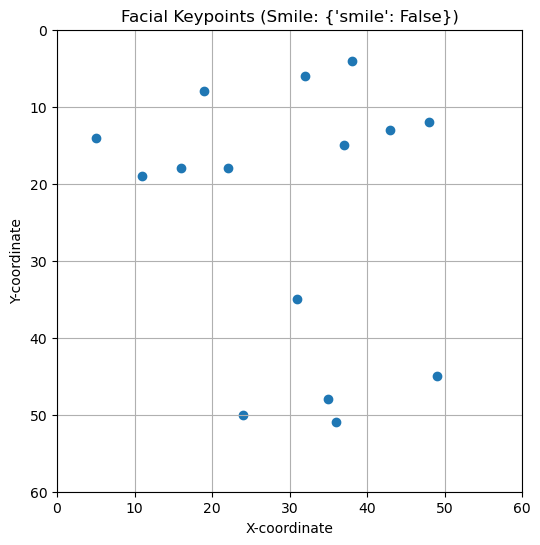

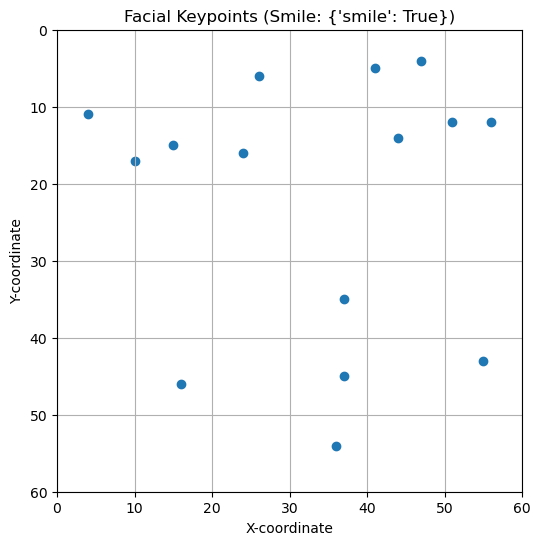

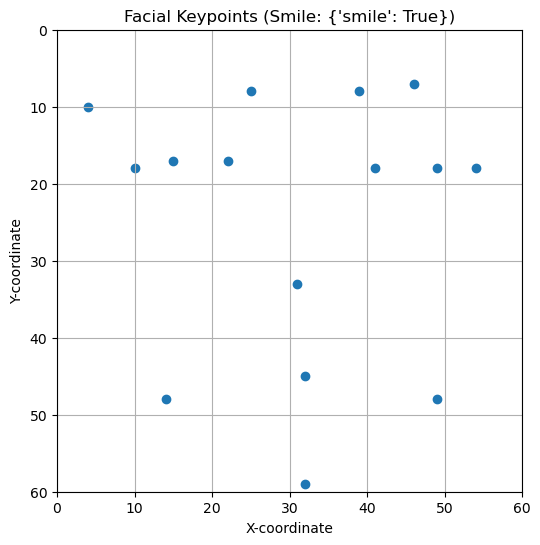

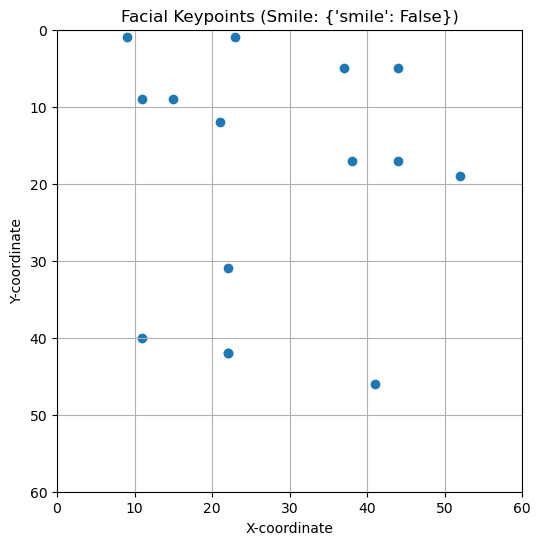

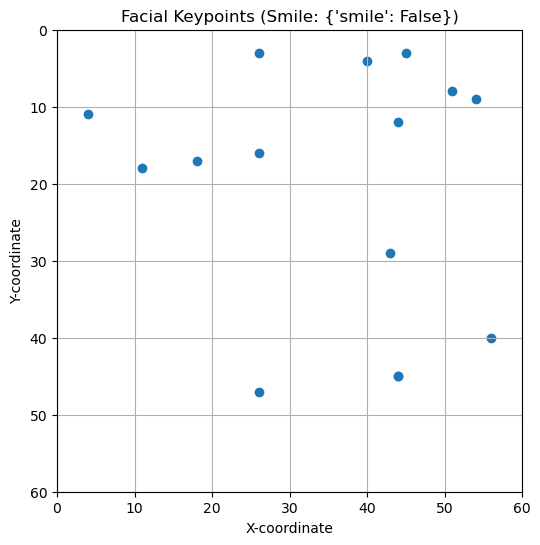

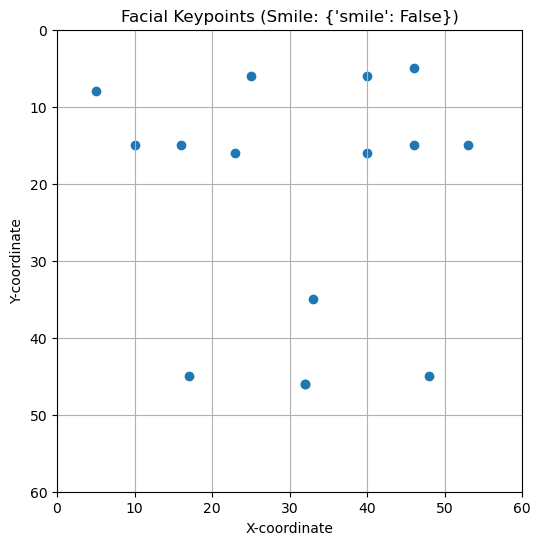

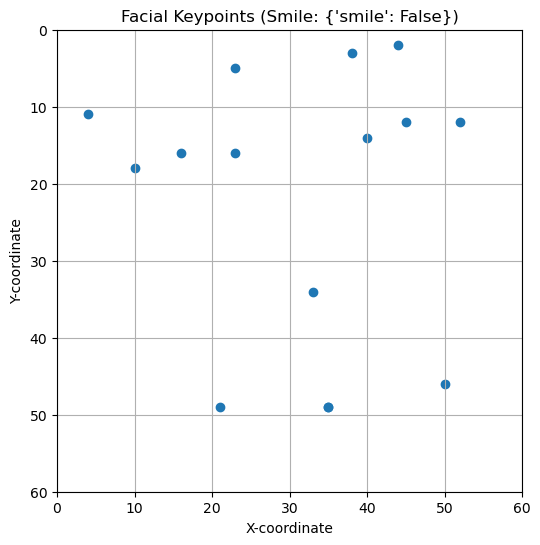

In [20]:
for i in fails["Fail Cases"]:
    sample = data['test'][int(i)]
    keypoints = sample[1:-1]
    # Separate x and y coordinates
    x_coords = [p[0] for p in keypoints]
    y_coords = [p[1] for p in keypoints]

    smile_status = sample[-1]
    title_text = f"Facial Keypoints (Smile: {smile_status})"

    #Plot for face visualization
    plt.figure(figsize=(6, 6))
    plt.scatter(x_coords, y_coords)
    plt.title(title_text)
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.grid(True)
    plt.xlim(0, 60) # Set x-axis range from 0 to 4
    plt.ylim(0, 60) 
    plt.gca().invert_yaxis() # Invert y-axis to make it look like a face
    #plt.axis([100, 100, 100, 100])
    
    plt.show()


